In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef

# Text Preprocessing

In [4]:
df=pd.read_csv("/content/drive/MyDrive/TRW PROJECT/Dataset-SA.csv")
print(df)

                                             product_name product_price Rate  \
0       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4       Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
...                                                   ...           ...  ...   
205047  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205048  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205049  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    3   
205050  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    5   
205051  cello Pack of 18 Opalware Cello Dazzle Lush Fi...          1299    4   

                 Review                

In [5]:
df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


### Handling null values

In [7]:
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,24664
Summary,11
Sentiment,0


In [8]:
print(df.columns)
df=df.dropna(subset=['Summary'])

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')


In [9]:
df.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,24662
Summary,0
Sentiment,0


### Tokenization

In [10]:
from nltk.tokenize import word_tokenize,sent_tokenize

df['Summary']=df['Summary'].apply(lambda x: x.strip())

In [11]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


#### Lowercase

In [12]:
df['product_price']=[[word.lower() for word in sentence]for sentence in df['product_price']]

In [13]:
df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",3,fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",1,unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",4,worth the money,very good,positive


### Stop word removel

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words=set(stopwords.words('english'))
def stopword(sentence):
    return [word for word in sentence if word not in stop_words]

df['words'] = df['Summary'].apply(lambda x: [word.lower() for word in x.split()])
df['words'] = df['words'].apply(stopword)
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,super!,great cooler excellent air flow and for this p...,positive,"[great, cooler, excellent, air, flow, price, a..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,awesome,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cooling]"
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",3,fair,the quality is good but the power of air is de...,positive,"[quality, good, power, air, decent]"
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",1,useless product,very bad product its a only a fan,negative,"[bad, product, fan]"
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",3,fair,ok ok product,neutral,"[ok, ok, product]"
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,awesome,the cooler is really fantastic and provides go...,positive,"[cooler, really, fantastic, provides, good, ai..."
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,highly recommended,very good product,positive,"[good, product]"
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",3,nice,very nice,positive,[nice]
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",1,unsatisfactory,very bad cooler,negative,"[bad, cooler]"
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",4,worth the money,very good,positive,[good]


In [16]:
df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,super!,great cooler excellent air flow and for this p...,positive,"[great, cooler, excellent, air, flow, price, a..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,awesome,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cooling]"
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",3,fair,the quality is good but the power of air is de...,positive,"[quality, good, power, air, decent]"
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",1,useless product,very bad product its a only a fan,negative,"[bad, product, fan]"
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",3,fair,ok ok product,neutral,"[ok, ok, product]"
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,awesome,the cooler is really fantastic and provides go...,positive,"[cooler, really, fantastic, provides, good, ai..."
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,highly recommended,very good product,positive,"[good, product]"
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",3,nice,very nice,positive,[nice]
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",1,unsatisfactory,very bad cooler,negative,"[bad, cooler]"
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",4,worth the money,very good,positive,[good]


### Stemming

In [17]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

def stemming_word(row):
    return [stemmer.stem(word) for word in row]

df['words']=df['words'].apply(stemming_word)

In [18]:
df.head(5)

,product_name,product_price,Rate,Review,Summary,Sentiment,words
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,super!,great cooler excellent air flow and for this p...,positive,"[great, cooler, excel, air, flow, price, amaz,..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",5,awesome,best budget 2 fit cooler nice cooling,positive,"[best, budget, 2, fit, cooler, nice, cool]"
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",3,fair,the quality is good but the power of air is de...,positive,"[qualiti, good, power, air, decent]"
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",1,useless product,very bad product its a only a fan,negative,"[bad, product, fan]"
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,"[3, 9, 9, 9]",3,fair,ok ok product,neutral,"[ok, ok, product]"


### Encoding

In [19]:
dict={'positive':1,'neutral':2,'negative':3}
df['Sentiment']=df['Sentiment'].map(dict)

In [20]:
df['Sentiment'].value_counts()

,count
Sentiment,
1,166575
3,28232
2,10234


### Remove unecessary columns

In [21]:
data=df[['words','Sentiment']]

In [22]:
data

,words,Sentiment
0,"[great, cooler, excel, air, flow, price, amaz,...",1
1,"[best, budget, 2, fit, cooler, nice, cool]",1
2,"[qualiti, good, power, air, decent]",1
3,"[bad, product, fan]",3
4,"[ok, ok, product]",2
...,...,...
205047,"[good, product]",1
205048,[nice],1
205049,"[nice, fast, deliveri]",1
205050,"[awesom, product]",1


# Feature Extraction

In [23]:
import spacy
nlp=spacy.load('en_core_web_sm')

def word_vec(x):
  if isinstance(x, str):
        doc = nlp(x)
  elif not isinstance(x[0], (int, float, np.float32)):
      doc = nlp(" ".join(x))
  else:
      return x

In [24]:
data

,words,Sentiment
0,"[great, cooler, excel, air, flow, price, amaz,...",1
1,"[best, budget, 2, fit, cooler, nice, cool]",1
2,"[qualiti, good, power, air, decent]",1
3,"[bad, product, fan]",3
4,"[ok, ok, product]",2
...,...,...
205047,"[good, product]",1
205048,[nice],1
205049,"[nice, fast, deliveri]",1
205050,"[awesom, product]",1


In [25]:
data.to_json('output.json', orient='records', lines=True)

In [26]:
data_2=pd.read_json('output.json',lines=True)

In [27]:
data_2

,words,Sentiment
0,"[great, cooler, excel, air, flow, price, amaz,...",1
1,"[best, budget, 2, fit, cooler, nice, cool]",1
2,"[qualiti, good, power, air, decent]",1
3,"[bad, product, fan]",3
4,"[ok, ok, product]",2
...,...,...
205036,"[good, product]",1
205037,[nice],1
205038,"[nice, fast, deliveri]",1
205039,"[awesom, product]",1


### Round the values

In [28]:
vectorized_data=data_2['words']

In [29]:
vectorized_data = vectorized_data.apply(lambda x: [round(float(value), 3) if isinstance(value, (int, float, str)) and value.isnumeric() else value for value in x])

In [30]:
vectorized_data=vectorized_data.apply(lambda x: np.array(x))

In [31]:
vectorized_data

,words
0,"[great, cooler, excel, air, flow, price, amaz,..."
1,"[best, budget, 2.0, fit, cooler, nice, cool]"
2,"[qualiti, good, power, air, decent]"
3,"[bad, product, fan]"
4,"[ok, ok, product]"
...,...
205036,"[good, product]"
205037,[nice]
205038,"[nice, fast, deliveri]"
205039,"[awesom, product]"


In [32]:
X_data=pd.DataFrame(vectorized_data.tolist())

In [33]:
data_3=pd.concat([data_2,X_data],axis=1)

In [34]:
data_3.isnull().sum()

,0
words,0
Sentiment,0
0,53
1,61010
2,114465
...,...
62,205034
63,205034
64,205035
65,205039


In [35]:
data_3=data_3.dropna()

In [36]:
data_3.to_json('data_4.json',orient='records',lines=True)

# Classification (Train 80% Test 20%) with different models

## Logistic Regression

In [37]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

data = {
    'review_text': ["Great product, highly recommended!",
                    "Worst purchase I made, totally dissatisfied.",
                    "The product is okay, not great.",
                    "I love this product, it's exactly as described.",
                    "Terrible quality, would never buy again."],
    'sentiment_label': [1, 0, 0, 1, 0]
}
df = pd.DataFrame(data)

def preprocess_text(text):
    text = text.lower()

    text = text.translate(str.maketrans("", "", string.punctuation))

    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]

    return " ".join(words)

df['cleaned_reviews'] = df['review_text'].apply(preprocess_text)

X = df['cleaned_reviews']
y = df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

example_review = "I really like the product. It works well and is durable!"
processed_review = preprocess_text(example_review)
processed_review_tfidf = vectorizer.transform([processed_review])
predicted_sentiment = model.predict(processed_review_tfidf)

print(f"Predicted Sentiment for '{example_review}': {'Positive' if predicted_sentiment[0] == 1 else 'Negative'}")


Accuracy: 1.00
Confusion Matrix:
[[1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted Sentiment for 'I really like the product. It works well and is durable!': Positive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [38]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
data

{'review_text': ['Great product, highly recommended!',
  'Worst purchase I made, totally dissatisfied.',
  'The product is okay, not great.',
  "I love this product, it's exactly as described.",
  'Terrible quality, would never buy again.'],
 'sentiment_label': [1, 0, 0, 1, 0]}

In [41]:
df = pd.DataFrame(data)

In [42]:
def preprocess_text(text):
    text = text.lower()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

In [44]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [46]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)


Accuracy: 1.00
Confusion Matrix:
[[1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



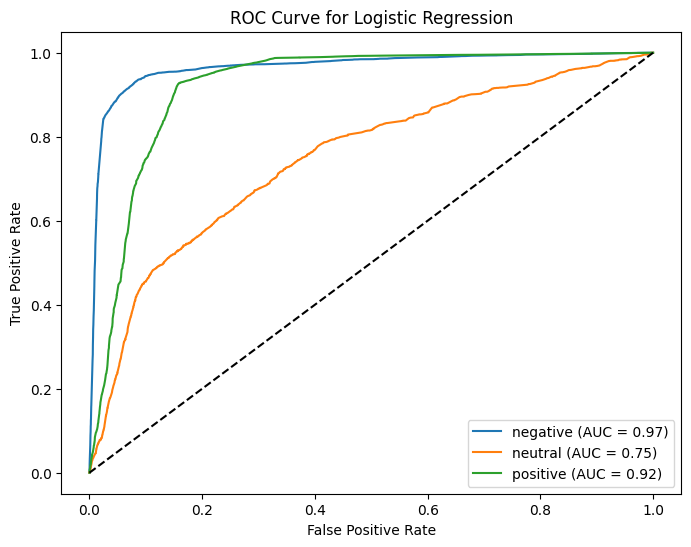

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load dataset
file_path = "/content/drive/MyDrive/TRW PROJECT/Dataset-SA.csv"
df = pd.read_csv("/content/drive/MyDrive/TRW PROJECT/Dataset-SA.csv")

# Drop missing target values
df = df.dropna(subset=["Sentiment"])

# Encode target labels
label_encoder = LabelEncoder()
df["Sentiment"] = label_encoder.fit_transform(df["Sentiment"])

# Convert Rate and product_price to numeric
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")
df["product_price"] = pd.to_numeric(df["product_price"], errors="coerce")

# Drop NaN values in numeric columns
df = df.dropna(subset=["Rate", "product_price"])

# Define features and target
X = df[["Rate", "product_price"]]
y = df["Sentiment"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict probabilities
y_score = clf.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()



## Decision Tree

Accuracy: 93.22%
              precision    recall  f1-score   support

    negative       0.77      0.71      0.74      5526
    positive       0.96      0.97      0.96     35485

    accuracy                           0.93     41011
   macro avg       0.86      0.84      0.85     41011
weighted avg       0.93      0.93      0.93     41011



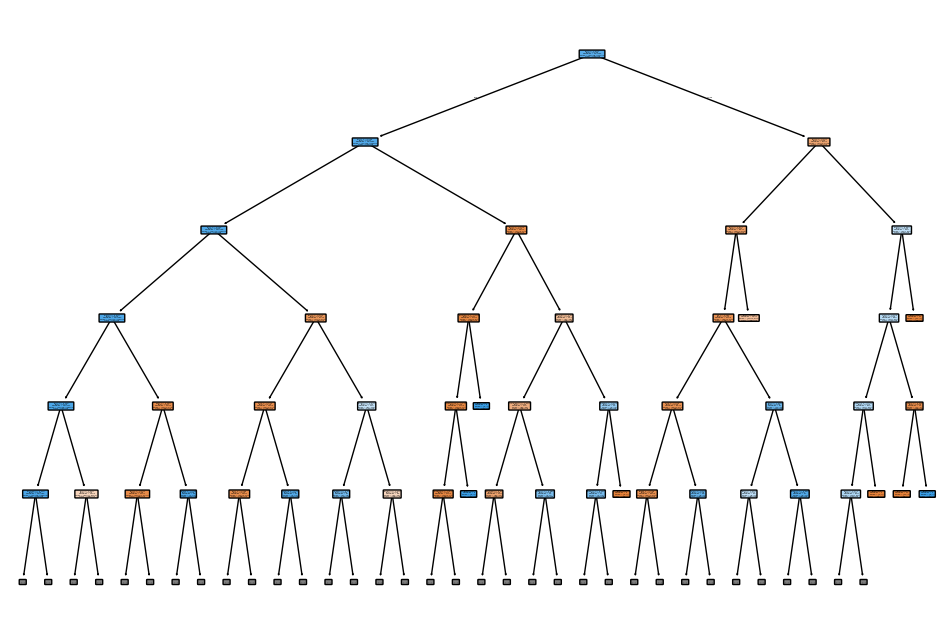

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

df = pd.read_csv('/content/drive/MyDrive/TRW PROJECT/Dataset-SA.csv')

df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

df['sentiment'] = df['Rate'].apply(lambda x: 'positive' if x >= 3 else 'negative')

X = df['Summary']
y = df['sentiment']

X = X.fillna('')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=vectorizer.get_feature_names_out(),
          class_names=clf.classes_, rounded=True, max_depth=5)
plt.show()

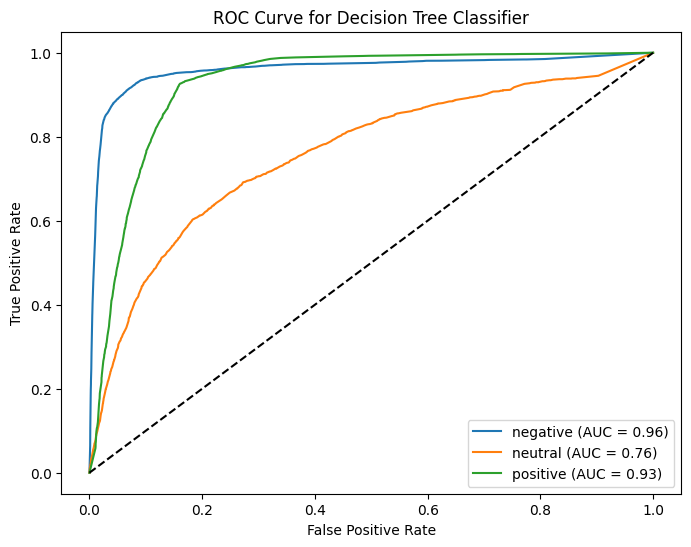

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Load dataset
file_path = "/content/drive/MyDrive/TRW PROJECT/Dataset-SA.csv"
df = pd.read_csv("/content/drive/MyDrive/TRW PROJECT/Dataset-SA.csv")

# Drop missing target values
df = df.dropna(subset=["Sentiment"])

# Encode target labels
label_encoder = LabelEncoder()
df["Sentiment"] = label_encoder.fit_transform(df["Sentiment"])

# Convert Rate and product_price to numeric
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")
df["product_price"] = pd.to_numeric(df["product_price"], errors="coerce")

# Drop NaN values in numeric columns
df = df.dropna(subset=["Rate", "product_price"])

# Define features and target
X = df[["Rate", "product_price"]]
y = df["Sentiment"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict probabilities
y_score = clf.predict_proba(X_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend()
plt.show()



In [50]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

data = {
    'review_text': ["Great product, highly recommended!",
                    "Worst purchase I made, totally dissatisfied.",
                    "The product is okay, not great.",
                    "I love this product, it's exactly as described.",
                    "Terrible quality, would never buy again."],
    'sentiment_label': [1, 0, 0, 1, 0]
}
df = pd.DataFrame(data)

def preprocess_text(text):
    text = text.lower()

    text = text.translate(str.maketrans("", "", string.punctuation))

    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]

    return " ".join(words)

df['cleaned_reviews'] = df['review_text'].apply(preprocess_text)

X = df['cleaned_reviews']
y = df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

example_review = "I really like the product. It works well and is durable!"
processed_review = preprocess_text(example_review)
processed_review_tfidf = vectorizer.transform([processed_review])
predicted_sentiment = model.predict(processed_review_tfidf)

print(f"Predicted Sentiment for '{example_review}': {'Positive' if predicted_sentiment[0] == 1 else 'Negative'}")


Accuracy: 0.00
Confusion Matrix:
[[0 1]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Predicted Sentiment for 'I really like the product. It works well and is durable!': Positive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

## All matrices chart for 70%-30%

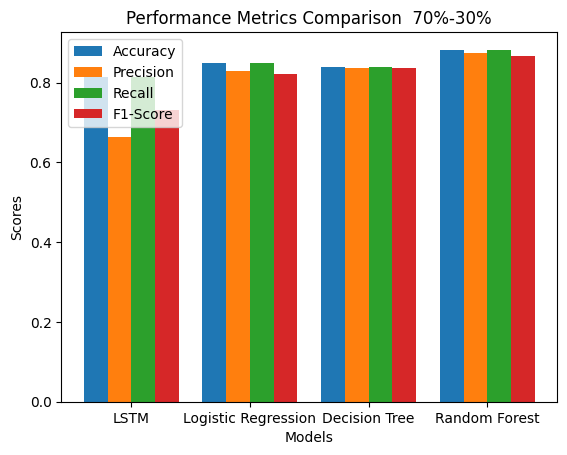

In [51]:
from sklearn.metrics import roc_curve, auc

models = ['LSTM', 'Logistic Regression','Decision Tree', 'Random Forest']
accuracy = [0.8140884921215669, 0.8479763240483276, 0.838691318275688, 0.8822544189147438]
precision = [0.6627400730047665, 0.8294364137952015, 0.8363339692992904, 0.8750556771036723]
recall = [0.8140884921215669, 0.8479763240483276, 0.8386913182756882, 0.8822544189147438]
f1_score = [0.7306590344219598, 0.8206401072350957, 0.8374715282929173, 0.8660138357156387]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

fig, ax = plt.subplots()
bar_width = 0.2
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, values[i], bar_width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison  70%-30%')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.show()

## All matrices plotting for (Train 80% and Test 20%)

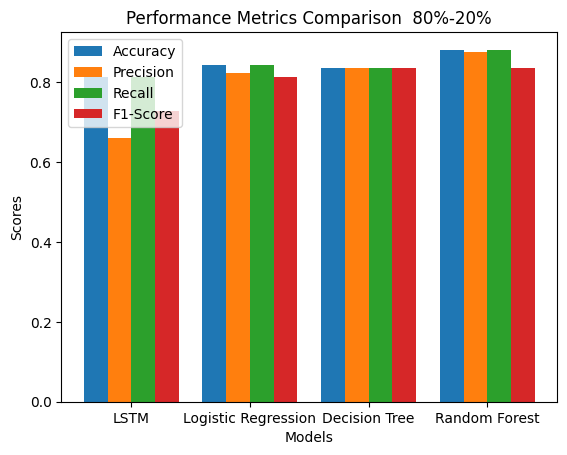

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = ['LSTM', 'Logistic Regression','Decision Tree', 'Random Forest']
accuracy = [0.8123567003268453, 0.8435045611981072, 0.8363578711156642, 0.8818966778867262]
precision = [0.6599234085659198, 0.8236043272296382, 0.8349725357116438, 0.8749840981943073]
recall = [0.8123567003268453, 0.8435045611981072, 0.8363578711156642, 0.8818966778867262]
f1_score = [0.7282489241184227, 0.8133471742197949, 0.835646491811487, 0.835646491811487]


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]

fig, ax = plt.subplots()
bar_width = 0.2
index = np.arange(len(models))

for i, metric in enumerate(metrics):
    ax.bar(index + i * bar_width, values[i], bar_width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison  80%-20%')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.show()

In [53]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

data = {
    'review_text': [
        "Great product, highly recommended!",
        "Worst purchase I made, totally dissatisfied.",
        "The product is okay, not great.",
        "I love this product, it's exactly as described.",
        "Terrible quality, would never buy again.",
        "This is a fantastic product!",
        "I would definitely recommend this.",
        "Not happy with the purchase.",
        "The product is defective.",
        "Amazing product, worth every penny!"
    ],
    'sentiment_label': [1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
}

df = pd.DataFrame(data)

def preprocess_text(text):
    """
    This function preprocesses the text by:
    1. Converting to lowercase
    2. Removing punctuation
    3. Removing stopwords
    4. Stemming
    """
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return " ".join(words)

df['cleaned_reviews'] = df['review_text'].apply(preprocess_text)

X = df['cleaned_reviews']
y = df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('')

Accuracy: 0.50



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

In [54]:
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(report)

Confusion Matrix:
[[1 1]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

